## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [1]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [2]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_134555_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (63629, 30)


In [3]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [4]:
DA.df_raw

sn                   ts  er   pac        lng  \
0      GCBZT02500A231212019  2024-06-04 16:25:00 NaN  2.47  114.27636   
1                       NaN                  NaN NaN   NaN        NaN   
2                       NaN                  NaN NaN   NaN        NaN   
3                       NaN                  NaN NaN   NaN        NaN   
4                       NaN                  NaN NaN   NaN        NaN   
...                     ...                  ...  ..   ...        ...   
63624  GCBZT02500A231212019  2025-05-10 19:05:00 NaN  0.00  114.27636   
63625  GCBZT02500A231212019  2025-05-10 19:10:00 NaN  0.00  114.27636   
63626  GCBZT02500A231212019  2025-05-10 19:15:00 NaN  0.00  114.27636   
63627  GCBZT02500A231212019  2025-05-10 19:20:00 NaN  0.00  114.27636   
63628  GCBZT02500A231212019  2025-05-10 19:25:00 NaN  0.00  114.27636   

             lat roof_type  angle  temperature_2m  relative_humidity_2m  ...  \
0      30.233355     斜屋顶双坡   15.0             NaN                   NaN  ...   
1            NaN       NaN    NaN         22.9135               73.1507  ...   
2            NaN       NaN    NaN         23.0109               73.4363  ...   
3            NaN       NaN    NaN         23.0107               73.5877  ...   
4            NaN       NaN    NaN         22.9288               74.1361  ...   
...          ...       ...    ...             ...                   ...  ...   
63624  30.233355     斜屋顶双坡   15.0             NaN                   NaN  ...   
63625  30.233355     斜屋顶双坡   15.0             NaN                   NaN  ...   
63626  30.233355     斜屋顶双坡   15.0         17.3933               64.8190  ...   
63627  30.233355     斜屋顶双坡   15.0             NaN                   NaN  ...   
63628  30.233355     斜屋顶双坡   15.0             NaN                   NaN  ...   

       direct_normal_irradiance  diffuse_radiation  wind_speed_10m  \
0                           NaN                NaN             NaN   
1                        0.8831            81.2706          2.9851   
2                        0.5298            66.7615          3.0137   
3                        0.2649            53.4491          3.0243   
4                        0.0883            41.3333          3.0140   
...                         ...                ...             ...   
63624                       NaN                NaN             NaN   
63625                       NaN                NaN             NaN   
63626                    0.0000             1.3814          1.9790   
63627                       NaN                NaN             NaN   
63628                       NaN                NaN             NaN   

       wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN              NaN                 NaN   
1              4.8247           5.2986             49.6167   
2              4.8532           5.3263             46.8926   
3              4.8934           5.3760             46.2535   
4              4.9411           5.4430             47.2945   
...               ...              ...                 ...   
63624             NaN              NaN                 NaN   
63625             NaN              NaN                 NaN   
63626          4.3540           5.0787            221.0234   
63627             NaN              NaN                 NaN   
63628             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  \
0                     NaN                  NaN                  NaN   
1                 55.7824              57.6712  2024-06-04 16:30:00   
2                 52.8599              54.7007  2024-06-04 16:45:00   
3                 51.9807              53.7448  2024-06-04 17:00:00   
4                 52.7399              54.3989  2024-06-04 17:15:00   
...                   ...                  ...                  ...   
63624                 NaN                  NaN                  NaN   
63625                 NaN        

In [5]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [6]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

full_time                    sn                   ts  er  \
0     2024-06-04 16:25:00  GCBZT02500A231212019  2024-06-04 16:25:00 NaN   
1     2024-06-04 16:30:00                   NaN                  NaN NaN   
2     2024-06-04 16:35:00                   NaN                  NaN NaN   
3     2024-06-04 16:40:00                   NaN                  NaN NaN   
4     2024-06-04 16:45:00                   NaN                  NaN NaN   
...                   ...                   ...                  ...  ..   
97952 2025-05-10 19:05:00  GCBZT02500A231212019  2025-05-10 19:05:00 NaN   
97953 2025-05-10 19:10:00  GCBZT02500A231212019  2025-05-10 19:10:00 NaN   
97954 2025-05-10 19:15:00  GCBZT02500A231212019  2025-05-10 19:15:00 NaN   
97955 2025-05-10 19:20:00  GCBZT02500A231212019  2025-05-10 19:20:00 NaN   
97956 2025-05-10 19:25:00  GCBZT02500A231212019  2025-05-10 19:25:00 NaN   

        pac        lng        lat roof_type  angle  temperature_2m  ...  \
0      2.47  114.27636  30.233355     斜屋顶双坡   15.0             NaN  ...   
1       NaN        NaN        NaN       NaN    NaN         22.9135  ...   
2       NaN        NaN        NaN       NaN    NaN             NaN  ...   
3       NaN        NaN        NaN       NaN    NaN             NaN  ...   
4       NaN        NaN        NaN       NaN    NaN         23.0109  ...   
...     ...        ...        ...       ...    ...             ...  ...   
97952  0.00  114.27636  30.233355     斜屋顶双坡   15.0             NaN  ...   
97953  0.00  114.27636  30.233355     斜屋顶双坡   15.0             NaN  ...   
97954  0.00  114.27636  30.233355     斜屋顶双坡   15.0         17.3933  ...   
97955  0.00  114.27636  30.233355     斜屋顶双坡   15.0             NaN  ...   
97956  0.00  114.27636  30.233355     斜屋顶双坡   15.0             NaN  ...   

       direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                   NaN                       NaN                NaN   
1                0.4986                    0.8831            81.2706   
2                   NaN                       NaN                NaN   
3                   NaN                       NaN                NaN   
4                0.2992                    0.5298            66.7615   
...                 ...                       ...                ...   
97952               NaN                       NaN                NaN   
97953               NaN                       NaN                NaN   
97954            0.0000                    0.0000             1.3814   
97955               NaN                       NaN                NaN   
97956               NaN                       NaN                NaN   

       wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN             NaN              NaN                 NaN   
1              2.9851          4.8247           5.2986             49.6167   
2                 NaN             NaN              NaN                 NaN   
3                 NaN             NaN              NaN                 NaN   
4              3.0137          4.8532           5.3263             46.8926   
...               ...             ...              ...                 ...   
97952             NaN             NaN              NaN                 NaN   
97953             NaN             NaN              NaN                 NaN   
97954          1.9790          4.3540           5.0787            221.0234   
97955             NaN             NaN              NaN                 NaN   
97956             NaN             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  
0                     NaN                  NaN                  NaN  
1                 55.7824              57.6712  2024-06-04 16:30:00  
2                     NaN                  NaN                  NaN  
3                     NaN                  NaN                  NaN  
4                 52.8599              54.7007  20

## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [7]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
        ...
        97779, 97780, 97781, 97782, 97783, 97784, 97785, 97786, 97787, 97788],
       dtype='int64', length=51479),
 True)

In [8]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [9]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [10]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
        ...
        97779, 97780, 97781, 97782, 97783, 97784, 97785, 97786, 97787, 97788],
       dtype='int64', length=51479),
 True)

In [11]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [12]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [13]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(RangeIndex(start=0, stop=97957, step=1), True)

In [14]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [15]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [16]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
        ...
        97779, 97780, 97781, 97782, 97783, 97784, 97785, 97786, 97787, 97788],
       dtype='int64', length=51479),
 True)

In [17]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [18]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [19]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
        ...
        97779, 97780, 97781, 97782, 97783, 97784, 97785, 97786, 97787, 97788],
       dtype='int64', length=51479),
 True)

In [20]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [21]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [22]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([    0,     2,     3,     5,     6,     8,     9,    11,    12,    14,
        ...
        97943, 97944, 97946, 97947, 97949, 97950, 97952, 97953, 97955, 97956],
       dtype='int64', length=65305),
 True)

In [23]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


full_time                    sn                   ts   er  \
0     2024-06-04 16:25:00  GCBZT02500A231212019  2024-06-04 16:25:00  0.0   
1     2024-06-04 16:30:00  GCBZT02500A231212019  2024-06-04 16:30:00  0.0   
2     2024-06-04 16:35:00  GCBZT02500A231212019  2024-06-04 16:35:00  0.0   
3     2024-06-04 16:40:00  GCBZT02500A231212019  2024-06-04 16:40:00  0.0   
4     2024-06-04 16:45:00  GCBZT02500A231212019  2024-06-04 16:45:00  0.0   
...                   ...                   ...                  ...  ...   
97952 2025-05-10 19:05:00  GCBZT02500A231212019  2025-05-10 19:05:00  0.0   
97953 2025-05-10 19:10:00  GCBZT02500A231212019  2025-05-10 19:10:00  0.0   
97954 2025-05-10 19:15:00  GCBZT02500A231212019  2025-05-10 19:15:00  0.0   
97955 2025-05-10 19:20:00  GCBZT02500A231212019  2025-05-10 19:20:00  0.0   
97956 2025-05-10 19:25:00  GCBZT02500A231212019  2025-05-10 19:25:00  0.0   

        pac        lng        lat roof_type  angle  temperature_2m  ...  \
0      2.47  114.27636  30.233355     斜屋顶双坡   15.0             NaN  ...   
1      0.00  114.27636  30.233355     斜屋顶双坡   15.0       22.913500  ...   
2      0.00  114.27636  30.233355     斜屋顶双坡   15.0       22.945967  ...   
3      0.00  114.27636  30.233355     斜屋顶双坡   15.0       22.978433  ...   
4      0.00  114.27636  30.233355     斜屋顶双坡   15.0       23.010900  ...   
...     ...        ...        ...       ...    ...             ...  ...   
97952  0.00  114.27636  30.233355     斜屋顶双坡   15.0       17.612500  ...   
97953  0.00  114.27636  30.233355     斜屋顶双坡   15.0       17.502900  ...   
97954  0.00  114.27636  30.233355     斜屋顶双坡   15.0       17.393300  ...   
97955  0.00  114.27636  30.233355     斜屋顶双坡   15.0       17.393300  ...   
97956  0.00  114.27636  30.233355     斜屋顶双坡   15.0       17.393300  ...   

       direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                   NaN                       NaN                NaN   
1              0.498600                  0.883100          81.270600   
2              0.432133                  0.765333          76.434233   
3              0.365667                  0.647567          71.597867   
4              0.299200                  0.529800          66.761500   
...                 ...                       ...                ...   
97952          0.000000                  0.000000           3.223267   
97953          0.000000                  0.000000           2.302333   
97954          0.000000                  0.000000           1.381400   
97955          0.000000                  0.000000           1.381400   
97956          0.000000                  0.000000           1.381400   

       wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN             NaN              NaN                 NaN   
1            2.985100          4.8247         5.298600           49.616700   
2            2.994633          4.8342         5.307833           48.708667   
3            3.004167          4.8437         5.317067           47.800633   
4            3.013700          4.8532         5.326300           46.892600   
...               ...             ...              ...                 ...   
97952        1.991800          4.3186         5.024033          221.880467   
97953        1.985400          4.3363         5.051367          221.451933   
97954        1.979000          4.3540         5.078700          221.023400   
97955        1.979000          4.3540         5.078700          221.023400   
97956        1.979000          4.3540         5.078700          221.023400   

       wind_direction_80m  wind_direction_120m        variable_date  
0                     NaN                  NaN                  NaN  
1               55.782400            57.671200  2024-06-04 16:30:00  
2               54.808233            56.681033                  NaN  
3               53.834067            55.690867                  NaN  
4               52.859900            5

In [24]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([0], dtype='int64'), True)

In [25]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [26]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=97957, step=1), True)

In [27]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [28]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

full_time                    sn  \
ts                                                              
2024-06-04 16:25:00 2024-06-04 16:25:00  GCBZT02500A231212019   
2024-06-04 16:30:00 2024-06-04 16:30:00  GCBZT02500A231212019   
2024-06-04 16:35:00 2024-06-04 16:35:00  GCBZT02500A231212019   
2024-06-04 16:40:00 2024-06-04 16:40:00  GCBZT02500A231212019   
2024-06-04 16:45:00 2024-06-04 16:45:00  GCBZT02500A231212019   
...                                 ...                   ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  GCBZT02500A231212019   
2025-05-10 19:10:00 2025-05-10 19:10:00  GCBZT02500A231212019   
2025-05-10 19:15:00 2025-05-10 19:15:00  GCBZT02500A231212019   
2025-05-10 19:20:00 2025-05-10 19:20:00  GCBZT02500A231212019   
2025-05-10 19:25:00 2025-05-10 19:25:00  GCBZT02500A231212019   

                                     ts   er   pac        lng        lat  \
ts                                                                         
2024-06-04 16:25:00 2024-06-04 16:25:00  0.0  2.47  114.27636  30.233355   
2024-06-04 16:30:00 2024-06-04 16:30:00  0.0  0.00  114.27636  30.233355   
2024-06-04 16:35:00 2024-06-04 16:35:00  0.0  0.00  114.27636  30.233355   
2024-06-04 16:40:00 2024-06-04 16:40:00  0.0  0.00  114.27636  30.233355   
2024-06-04 16:45:00 2024-06-04 16:45:00  0.0  0.00  114.27636  30.233355   
...                                 ...  ...   ...        ...        ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.00  114.27636  30.233355   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0  0.00  114.27636  30.233355   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0  0.00  114.27636  30.233355   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0  0.00  114.27636  30.233355   
2025-05-10 19:25:00 2025-05-10 19:25:00  0.0  0.00  114.27636  30.233355   

                    roof_type  angle  temperature_2m  ...  direct_radiation  \
ts                                                    ...                     
2024-06-04 16:25:00     斜屋顶双坡   15.0             NaN  ...               NaN   
2024-06-04 16:30:00     斜屋顶双坡   15.0       22.913500  ...          0.498600   
2024-06-04 16:35:00     斜屋顶双坡   15.0       22.945967  ...          0.432133   
2024-06-04 16:40:00     斜屋顶双坡   15.0       22.978433  ...          0.365667   
2024-06-04 16:45:00     斜屋顶双坡   15.0       23.010900  ...          0.299200   
...                       ...    ...             ...  ...               ...   
2025-05-10 19:05:00     斜屋顶双坡   15.0       17.612500  ...          0.000000   
2025-05-10 19:10:00     斜屋顶双坡   15.0       17.502900  ...          0.000000   
2025-05-10 19:15:00     斜屋顶双坡   15.0       17.393300  ...          0.000000   
2025-05-10 19:20:00     斜屋顶双坡   15.0       17.393300  ...          0.000000   
2025-05-10 19:25:00     斜屋顶双坡   15.0       17.393300  ...          0.000000   

                     direct_normal_irradiance  diffuse_radiation  \
ts                                                                 
2024-06-04 16:25:00                       NaN                NaN   
2024-06-04 16:30:00                  0.883100          81.270600   
2024-06-04 16:35:00                  0.765333          76.434233   
2024-06-04 16:40:00                  0.647567          71.597867   
2024-06-04 16:45:00                  0.529800          66.761500   
...                                       ...                ...   
2025-05-10 19:05:00                  0.000000           3.223267   
2025-05-10 19:10:00                  0.000000           2.302333   
2025-05-10 19:15:00                  0.000000           1.381400   
2025-05-10 19:20:00                  0.000000           1.381400   
2025-05-10 19:25:00                  0.000000           1.381400   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
ts                                                                     
2024-06-04 16:25:00             NaN             NaN              NaN   
2024-06-04 16:30:00        2.985100          4.8247         5.2986

In [29]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [30]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [31]:
DA.df_raw

full_time                    sn  \
2024-06-04 16:25:00 2024-06-04 16:25:00  GCBZT02500A231212019   
2024-06-04 16:30:00 2024-06-04 16:30:00  GCBZT02500A231212019   
2024-06-04 16:35:00 2024-06-04 16:35:00  GCBZT02500A231212019   
2024-06-04 16:40:00 2024-06-04 16:40:00  GCBZT02500A231212019   
2024-06-04 16:45:00 2024-06-04 16:45:00  GCBZT02500A231212019   
...                                 ...                   ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  GCBZT02500A231212019   
2025-05-10 19:10:00 2025-05-10 19:10:00  GCBZT02500A231212019   
2025-05-10 19:15:00 2025-05-10 19:15:00  GCBZT02500A231212019   
2025-05-10 19:20:00 2025-05-10 19:20:00  GCBZT02500A231212019   
2025-05-10 19:25:00 2025-05-10 19:25:00  GCBZT02500A231212019   

                                     ts   er   pac        lng        lat  \
2024-06-04 16:25:00 2024-06-04 16:25:00  0.0  2.47  114.27636  30.233355   
2024-06-04 16:30:00 2024-06-04 16:30:00  0.0  0.00  114.27636  30.233355   
2024-06-04 16:35:00 2024-06-04 16:35:00  0.0  0.00  114.27636  30.233355   
2024-06-04 16:40:00 2024-06-04 16:40:00  0.0  0.00  114.27636  30.233355   
2024-06-04 16:45:00 2024-06-04 16:45:00  0.0  0.00  114.27636  30.233355   
...                                 ...  ...   ...        ...        ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.00  114.27636  30.233355   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0  0.00  114.27636  30.233355   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0  0.00  114.27636  30.233355   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0  0.00  114.27636  30.233355   
2025-05-10 19:25:00 2025-05-10 19:25:00  0.0  0.00  114.27636  30.233355   

                    roof_type  angle  temperature_2m  ...  \
2024-06-04 16:25:00     斜屋顶双坡   15.0             NaN  ...   
2024-06-04 16:30:00     斜屋顶双坡   15.0       22.913500  ...   
2024-06-04 16:35:00     斜屋顶双坡   15.0       22.945967  ...   
2024-06-04 16:40:00     斜屋顶双坡   15.0       22.978433  ...   
2024-06-04 16:45:00     斜屋顶双坡   15.0       23.010900  ...   
...                       ...    ...             ...  ...   
2025-05-10 19:05:00     斜屋顶双坡   15.0       17.612500  ...   
2025-05-10 19:10:00     斜屋顶双坡   15.0       17.502900  ...   
2025-05-10 19:15:00     斜屋顶双坡   15.0       17.393300  ...   
2025-05-10 19:20:00     斜屋顶双坡   15.0       17.393300  ...   
2025-05-10 19:25:00     斜屋顶双坡   15.0       17.393300  ...   

                     direct_normal_irradiance  diffuse_radiation  \
2024-06-04 16:25:00                       NaN                NaN   
2024-06-04 16:30:00                  0.883100          81.270600   
2024-06-04 16:35:00                  0.765333          76.434233   
2024-06-04 16:40:00                  0.647567          71.597867   
2024-06-04 16:45:00                  0.529800          66.761500   
...                                       ...                ...   
2025-05-10 19:05:00                  0.000000           3.223267   
2025-05-10 19:10:00                  0.000000           2.302333   
2025-05-10 19:15:00                  0.000000           1.381400   
2025-05-10 19:20:00                  0.000000           1.381400   
2025-05-10 19:25:00                  0.000000           1.381400   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
2024-06-04 16:25:00             NaN             NaN              NaN   
2024-06-04 16:30:00        2.985100          4.8247         5.298600   
2024-06-04 16:35:00        2.994633          4.8342         5.307833   
2024-06-04 16:40:00        3.004167          4.8437         5.317067   
2024-06-04 16:45:00        3.013700          4.8532         5.326300   
...                             ...             ...              ...   
2025-05-10 19:05:00        1.991800          4.3186         5.024033   
2025-05-10 19:10:00        1.985400          4.3363         5.051367   
2025-05-10 19:15:00        1.979000          4.3540         5.078700   
2025-05-10 19:20:00        1.979000          4.3540         5.0787

In [32]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex(['2024-06-04 16:25:00'], dtype='datetime64[ns]', freq=None),
 True)

In [33]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [34]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(97957, 31)

In [35]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [36]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

feature      average
0              temperature_2m    18.464762
1        relative_humidity_2m    69.237313
2                dew_point_2m    12.238786
3                pressure_msl  1015.611064
4            surface_pressure  1011.334515
5   precipitation_probability    11.902995
6                 cloud_cover    56.384084
7             cloud_cover_low    12.929293
8             cloud_cover_mid    30.897148
9            cloud_cover_high    35.620305
10        shortwave_radiation   164.234910
11           direct_radiation    94.077610
12   direct_normal_irradiance   147.855188
13          diffuse_radiation    70.157299
14             wind_speed_10m     2.562263
15             wind_speed_80m     4.196032
16            wind_speed_120m     4.651006
17         wind_direction_10m   140.892744
18         wind_direction_80m   141.640278
19        wind_direction_120m   141.716714
20                   pac_copy     2.672668

In [37]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [38]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

feature      variance
0              temperature_2m     97.756169
1        relative_humidity_2m    338.001358
2                dew_point_2m    105.759116
3                pressure_msl    109.265678
4            surface_pressure    105.715137
5   precipitation_probability    887.927172
6                 cloud_cover   1799.949141
7             cloud_cover_low    783.202171
8             cloud_cover_mid   1600.455801
9            cloud_cover_high   1721.887529
10        shortwave_radiation  55903.012036
11           direct_radiation  27650.285167
12   direct_normal_irradiance  51680.371377
13          diffuse_radiation   8086.643945
14             wind_speed_10m      2.069797
15             wind_speed_80m      4.387467
16            wind_speed_120m      5.292570
17         wind_direction_10m   9843.439754
18         wind_direction_80m   9597.264205
19        wind_direction_120m   9510.344530
20                   pac_copy     19.737258

In [39]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [40]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

feature  standard deviation
0              temperature_2m            9.887172
1        relative_humidity_2m           18.384813
2                dew_point_2m           10.283925
3                pressure_msl           10.453022
4            surface_pressure           10.281787
5   precipitation_probability           29.798107
6                 cloud_cover           42.425807
7             cloud_cover_low           27.985749
8             cloud_cover_mid           40.005697
9            cloud_cover_high           41.495633
10        shortwave_radiation          236.438178
11           direct_radiation          166.283749
12   direct_normal_irradiance          227.333173
13          diffuse_radiation           89.925769
14             wind_speed_10m            1.438679
15             wind_speed_80m            2.094628
16            wind_speed_120m            2.300559
17         wind_direction_10m           99.214111
18         wind_direction_80m           97.965628
19        wind_direction_120m           97.520995
20                   pac_copy            4.442663

In [41]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [42]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

feature  max value
0              temperature_2m    39.1780
1        relative_humidity_2m    99.9394
2                dew_point_2m    27.9391
3                pressure_msl  1040.8709
4            surface_pressure  1036.2613
5   precipitation_probability   100.0000
6                 cloud_cover   100.0000
7             cloud_cover_low   100.0000
8             cloud_cover_mid   100.0000
9            cloud_cover_high   100.0000
10        shortwave_radiation   898.0712
11           direct_radiation   736.8413
12   direct_normal_irradiance   790.5842
13          diffuse_radiation   400.4993
14             wind_speed_10m    10.1411
15             wind_speed_80m    15.4495
16            wind_speed_120m    16.7713
17         wind_direction_10m   358.3642
18         wind_direction_80m   358.3874
19        wind_direction_120m   358.1824
20                   pac_copy    23.2000

In [43]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [44]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

feature  min value
0              temperature_2m    -3.9917
1        relative_humidity_2m    14.8629
2                dew_point_2m   -17.2240
3                pressure_msl   991.4371
4            surface_pressure   987.4745
5   precipitation_probability     0.0000
6                 cloud_cover     0.0000
7             cloud_cover_low     0.0000
8             cloud_cover_mid     0.0000
9            cloud_cover_high     0.0000
10        shortwave_radiation     0.0000
11           direct_radiation     0.0000
12   direct_normal_irradiance     0.0000
13          diffuse_radiation     0.0000
14             wind_speed_10m     0.0652
15             wind_speed_80m     0.2129
16            wind_speed_120m     0.2682
17         wind_direction_10m     2.0030
18         wind_direction_80m     1.1972
19        wind_direction_120m     1.7198
20                   pac_copy     0.0000

In [45]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [46]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

feature       median
0              temperature_2m    19.130733
1        relative_humidity_2m    71.357583
2                dew_point_2m    13.041933
3                pressure_msl  1016.147267
4            surface_pressure  1011.875733
5   precipitation_probability     0.000000
6                 cloud_cover    70.292800
7             cloud_cover_low     0.006300
8             cloud_cover_mid     5.673933
9            cloud_cover_high     8.455967
10        shortwave_radiation    14.669550
11           direct_radiation     0.796400
12   direct_normal_irradiance     3.498667
13          diffuse_radiation    11.568550
14             wind_speed_10m     2.234583
15             wind_speed_80m     3.934917
16            wind_speed_120m     4.391533
17         wind_direction_10m   114.392367
18         wind_direction_80m   117.655317
19        wind_direction_120m   118.276550
20                   pac_copy     0.000000

In [47]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [48]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

temperature_2m  relative_humidity_2m  dew_point_2m  pressure_msl  \
0.333333       12.705178             61.226578      6.582567   1008.683511   
0.666667       24.538233             79.961411     19.101322   1021.947678   

          surface_pressure  precipitation_probability  cloud_cover  \
0.333333       1004.546311                        0.0    18.654500   
0.666667       1017.551044                        0.0    97.908222   

          cloud_cover_low  cloud_cover_mid  cloud_cover_high  ...  \
0.333333           0.0000         0.080233          0.004322  ...   
0.666667           2.4741        31.890700         57.792300  ...   

          direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0.333333          0.000000                  0.000000           0.000000   
0.666667         35.994989                100.707578          99.567589   

          wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0.333333        1.792456        3.037778         3.369300           78.585889   
0.666667        2.871567        4.913078         5.520911          190.935922   

          wind_direction_80m  wind_direction_120m  pac_copy  
0.333333           81.673811              82.2597      0.00  
0.666667          192.912633             193.8643      1.62  

[2 rows x 21 columns]

## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [49]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m                   1.000000             -0.059327      0.898304   
relative_humidity_2m            -0.059327              1.000000      0.379246   
dew_point_2m                     0.898304              0.379246      1.000000   
pressure_msl                    -0.878156             -0.205109     -0.899966   
surface_pressure                -0.874903             -0.208427     -0.898394   
precipitation_probability        0.049202              0.333192      0.180963   
cloud_cover                      0.022748              0.147276      0.086084   
cloud_cover_low                 -0.090007              0.293366      0.037405   
cloud_cover_mid                 -0.226520              0.126707     -0.152707   
cloud_cover_high                 0.247217              0.103400      0.271615   
shortwave_radiation              0.364285             -0.456238      0.131117   
direct_radiation                 0.345547             -0.452269      0.113298   
direct_normal_irradiance         0.289500             -0.488243      0.043287   
diffuse_radiation                0.318843             -0.363268      0.135238   
wind_speed_10m                   0.221556             -0.220129      0.110872   
wind_speed_80m                   0.100381             -0.087133      0.061519   
wind_speed_120m                  0.070318             -0.056120      0.048147   
wind_direction_10m               0.068677              0.100397      0.098418   
wind_direction_80m               0.080703              0.096514      0.108066   
wind_direction_120m              0.083245              0.095455      0.109659   
pac_copy                         0.285141             -0.488540      0.039923   

                           pressure_msl  surface_pressure  \
temperature_2m                -0.878156         -0.874903   
relative_humidity_2m          -0.205109         -0.208427   
dew_point_2m                  -0.899966         -0.898394   
pressure_msl                   1.000000          0.999977   
surface_pressure               0.999977          1.000000   
precipitation_probability     -0.156274         -0.157480   
cloud_cover                   -0.078746         -0.079319   
cloud_cover_low                0.028690          0.027838   
cloud_cover_mid                0.167624          0.166605   
cloud_cover_high              -0.298717         -0.298888   
shortwave_radiation           -0.134539         -0.131140   
direct_radiation              -0.120768         -0.117483   
direct_normal_irradiance      -0.061152         -0.057906   
diffuse_radiation             -0.130424         -0.127561   
wind_speed_10m                -0.129685         -0.128179   
wind_speed_80m                -0.092822         -0.092563   
wind_speed_120m               -0.082045         -0.082075   
wind_direction_10m            -0.126114         -0.126722   
wind_direction_80m            -0.148660         -0.149372   
wind_direction_120m           -0.153144         -0.153875   
pac_copy                      -0.057780         -0.054512   

                           precipitation_probability  cloud_cover  \
temperature_2m                              0.049202     0.022748   
relative_humidity_2m                        0.333192     0.147276   
dew_point_2m                                0.180963     0.086084   
pressure_msl                               -0.156274    -0.078746   
surface_pressure                           -0.157480    -0.079319   
precipitation_probability                   1.000000     0.340535   
cloud_cover                                 0.340535     1.000000   
cloud_cover_low                             0.406866     0.372821   
cloud_cover_mid                             0.419903     0.642500   
cloud_cover_high                            0.233355     0.677805   
shortwave_radiation                        -0.067441    -0.125794   
direct_radiation                           -0.113546    -0.242694   
dire

In [50]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [51]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

feature  self correlation
0              temperature_2m          0.870937
1        relative_humidity_2m          0.172674
2                dew_point_2m          0.973417
3                pressure_msl          0.973507
4            surface_pressure          0.973357
5   precipitation_probability          0.382138
6                 cloud_cover          0.545900
7             cloud_cover_low          0.566806
8             cloud_cover_mid          0.575189
9            cloud_cover_high          0.517649
10        shortwave_radiation         -0.337658
11           direct_radiation         -0.235600
12   direct_normal_irradiance         -0.212316
13          diffuse_radiation         -0.377708
14             wind_speed_10m          0.553085
15             wind_speed_80m          0.580998
16            wind_speed_120m          0.552433
17         wind_direction_10m          0.393702
18         wind_direction_80m          0.428899
19        wind_direction_120m          0.439563
20                   pac_copy         -0.255824

In [52]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [53]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([ 36154.44471796,  89943.75689401, 204054.74641638]),
 'fft_periods': array([288, 144, 288])}

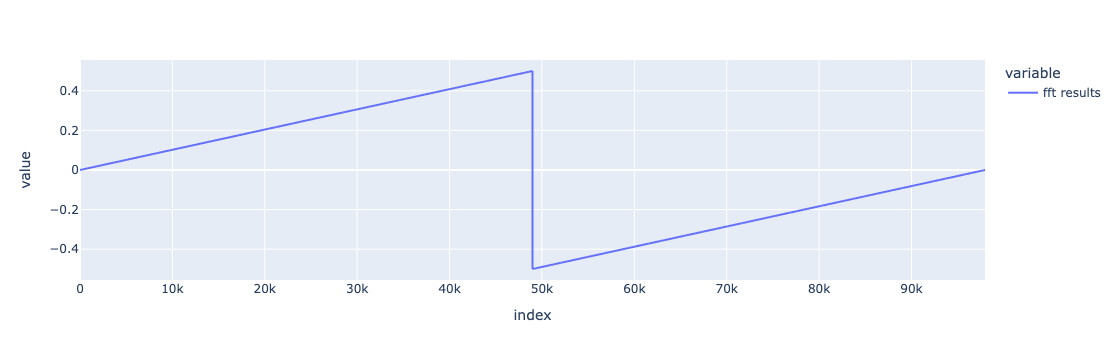

In [54]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [55]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -36.865385946937664,
  'P-value': 0.0,
  'Lags': np.int64(55),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic                -36.865
  P-value                         0.000
  Lags                               55
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [56]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-88.32775132614171),
  'P-value': 0.0,
  'Lags': 68,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic                -88.328
  P-value                         0.000
  Lags                               68
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [57]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -36.79654395994077,
  'P-value': 0.0,
  'Lags': np.int64(55),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic                -36.797
  P-value                         0.000
  Lags                               55
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}